<a href="https://colab.research.google.com/github/GlenH0/AI-Mini-Project/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Initialisation**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
from sklearn import linear_model

train = pd.read_csv('/content/train.csv')

print(train.head(10))


   Id BldgType  OverallQual  GrLivArea  GarageArea  SalePrice
0   1     1Fam            7       1710         548     208500
1   2     1Fam            6       1262         460     181500
2   3     1Fam            7       1786         608     223500
3   4     1Fam            7       1717         642     140000
4   5     1Fam            8       2198         836     250000
5   6     1Fam            5       1362         480     143000
6   7     1Fam            8       1694         636     307000
7   8     1Fam            7       2090         484     200000
8   9     1Fam            7       1774         468     129900
9  10   2FmCon            5       1077         205     118000


In [ ]:
test = pd.read_csv ('/content/test.csv')
print(test.head(10))

     Id BldgType  OverallQual  GrLivArea  GarageArea
0  1202     1Fam            7       1779         546
1  1203     1Fam            5       1348         216
2  1204     1Fam            7       1630         451
3  1205     1Fam            5       1074         495
4  1206     1Fam            7       2196         701
5  1207     1Fam            4       1056         384
6  1208     1Fam            6       1700         544
7  1209     1Fam            5       1283         506
8  1210     1Fam            8       1660         500
9  1211     1Fam            6       1845         462


In [ ]:
train_Id = train['Id']
test_Id = test['Id']

train.drop(['Id'], inplace = True, axis = 1)
test.drop(['Id'], inplace = True, axis = 1)

In [ ]:
def encode_and_bind(original_dataframe, feature_to_encode):

    dummy = pd.get_dummies(original_dataframe[[feature_to_encode]])

    res = pd.concat([original_dataframe, dummy], axis=1)

    return(res)

In [ ]:
df = train

df['OverallQual'] = df['OverallQual'].astype(str)
train_new = encode_and_bind(df, 'BldgType')
train_encode = encode_and_bind(train_new, 'OverallQual')

x = train_encode.drop(['SalePrice', 'BldgType', 'OverallQual'], axis = 'columns')

x.head()

,GrLivArea,GarageArea,BldgType_1Fam,BldgType_2FmCon,BldgType_Duplx,BldgType_TwnhsE,BldgType_TwnhsI,OverallQual_1,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9
0,1710,548,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1262,460,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1786,608,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1717,642,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2198,836,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
y = train_encode['SalePrice']

y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

# **Multiple Linear Regression**

In [ ]:
X = x
Y = y

Y.shape
X.shape

(1000, 17)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 42)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
np.set_printoptions(suppress=True)
regressor.coef_

array([    56.24760275,     68.83929229,  13771.84274213,   -960.9681661 ,
        -8523.82205546,   7713.15508953, -12000.2076101 , -60711.13824052,
       143688.87270452, -88934.22348392, -60675.10706898, -45923.33409228,
       -37436.89433367, -21470.50690325,   2077.17194822,  47296.12466562,
       122089.03480425])

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
# r2 score for linear
from sklearn.metrics import r2_score

test_set_r2 = r2_score(Y_test, y_pred)
# The closer towards 1, the better the fit
test_set_r2



0.7767688400584829

In [ ]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
521,150000,147675.385268
737,239900,279713.363193
740,132000,143935.690170
660,197900,224821.766171
411,145000,122647.710592


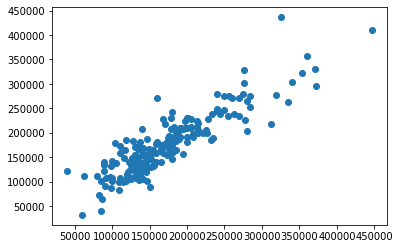

In [ ]:
plt.scatter(Y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


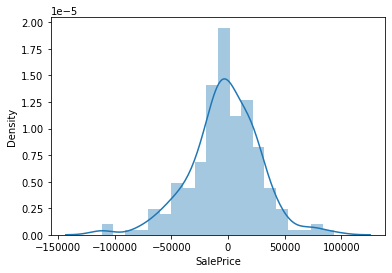

In [ ]:
import seaborn as sns
sns.distplot((Y_test - y_pred), bins= 20); #bins is the number of bar i want to show in histogram

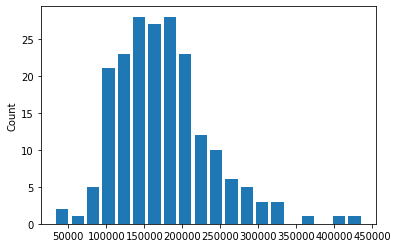

In [ ]:
# histogram
plt.hist((y_pred), bins= 20, rwidth = 0.8)
plt.ylabel('Count')
plt.show()

In [ ]:
# For calculating my mae, mse, rmse...
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [ ]:
print_evaluate(Y_test, regressor.predict(X_test))

MAE: 22643.417620959764
MSE: 932259643.7763058
RMSE: 30532.92720615411
R2 Square 0.7767688400584829


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
# Note that for rmse, the lower that value is, the better the fit
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 22643.417620959764
Mean Squared Error: 932259643.7763058
Root Mean Squared Error: 30532.92720615411


In [ ]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(Y_test, y_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,22643.417621,9.322596e+08,30532.927206,0.776769,0.78899


# **Prediction for Test - part c of question**

In [ ]:
# adjust test_encoded.csv to form same param as x (train_encoded.csv)

df = test
# range from 1 to 10, excluding 11
for a in range(1,11):
# check if any of the value is in the table
  if a not in (df['OverallQual'].unique()):

    l= 'OverallQual_' +str(a)

    b=[]

    for item in df['GarageArea']:

      b.append(0)

    df[l] = b

In [ ]:
# convert to string for encoding
df['OverallQual'] = df['OverallQual'].astype(str)
# encoding BldgType and OverallQual
test_new = encode_and_bind(df, 'BldgType')
test_encode = encode_and_bind(test_new, 'OverallQual')
# Removing original col since encoded 
z = test_encode.drop(['BldgType', 'OverallQual'], axis = 'columns')

z.head()

,GrLivArea,GarageArea,OverallQual_1,OverallQual_2,BldgType_1Fam,BldgType_2FmCon,BldgType_Duplx,BldgType_TwnhsE,BldgType_TwnhsI,OverallQual_10,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9
0,1779,546,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,1348,216,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,1630,451,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,1074,495,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,2196,701,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# predicting saleprice
regressor.predict(z)

array([193476.11817518, 107002.36865071, 178555.49259735, 110796.68804609,
       227601.45882812,  93656.62999353, 165347.2001217 , 123309.66923652,
       228834.99871964, 167858.28055283, 233459.0638345 ,  61731.65669287,
        86880.07428347,  93154.45584272,  93030.95810627, 172888.63386155,
       212952.97136656,  59122.68695705, 252999.97534824,  87434.84289577,
       106593.41205661, 157795.15218864, 172803.33881458, 166343.95279764,
       114461.04553318, 186988.96380719, 107260.55907589, 291802.28133403,
       128887.52443922, 201507.22203704, 116942.79256385, 104999.30650004,
       119687.12928236, 126781.60481098, 129048.10892816, 332126.50066905,
       195271.96230359, 129774.43264569, 217007.92045107, 192650.87666803,
       216500.26518265, 158150.96364608, 140097.40561725, 213907.66229686,
       170184.56480051, 185514.07112133, 151567.0132372 , 175295.62664777,
        90883.58919744, 210441.93167115, 115571.12668494,  85297.43399119,
       213372.68785886, 1

In [ ]:
# converting predicted saleprice into dataframe
df['Predicted_SalePrice'] = pd.DataFrame(regressor.predict(z))

df['Predicted_SalePrice'].head()

0    193476.118175
1    107002.368651
2    178555.492597
3    110796.688046
4    227601.458828
Name: Predicted_SalePrice, dtype: float64

In [ ]:
df.to_excel(excel_writer = "C:\\Users\\Admin\\Downloads\\data\\test.xlsx")

# **LASSO regression**

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso(alpha = 20, max_iter = 5000, tol = 0.001)
model.fit(X_train, Y_train)
pred = model.predict(X_test)

print_evaluate(Y_test, pred)

MAE: 22615.287533156825
MSE: 930456697.8484045
RMSE: 30503.388301111805
R2 Square 0.7772005585324984


In [ ]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(Y_test, pred) , cross_val(Lasso(alpha = 20, max_iter = 5000, tol = 0.001))]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,22643.417621,9.322596e+08,30532.927206,0.776769,0.788990
1,Lasso Regression,22615.287533,9.304567e+08,30503.388301,0.777201,0.788821
